In [48]:
# Importo libreria para trabajar con dates 
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# OBJETIVO

### Desarrollar un modelo predictivo para la detección de riesgo de crédito, que permita evaluar la probabilidad de incumplimiento de los solicitantes de préstamos.

### CONTEXTO COMERCIAL
Como analista de riesgo en una institución financiera, busco optimizar la aprobación de préstamos para reducir la morosidad y maximizar los ingresos. Estoy evaluando un conjunto de datos de solicitantes de crédito para identificar patrones que nos permitan predecir con precisión el riesgo de incumplimiento y tomar decisiones informadas sobre la aprobación de nuevos préstamos.

### PROBLEMA COMERCIAL
Nuestra institución financiera enfrenta altos niveles de incumplimiento de préstamos, lo que afecta la rentabilidad y la estabilidad. Necesitamos identificar de manera precisa los solicitantes con mayor riesgo de impago para minimizar pérdidas y mejorar la gestión de riesgos. Analizar este conjunto de datos nos permitirá desarrollar un modelo predictivo que optimice la evaluación de crédito y reduzca el número de préstamos impagados.

### CONTEXTO ANALITICO
Contamos con un extenso conjunto de datos de solicitantes de préstamos, que incluye información detallada sobre ingresos, puntuaciones de crédito, historial de pagos y más. Utilizaremos técnicas de análisis exploratorio de datos y modelado predictivo para identificar patrones y factores que influyen en el incumplimiento de préstamos. Nuestro objetivo es construir un modelo que permita predecir con precisión el riesgo de impago, ayudando así a tomar decisiones más informadas y reducir la morosidad en nuestra cartera de préstamos.


In [49]:
# Levanto el data set desde mi repositori el GitHub y reviso lo importado
url = 'https://raw.githubusercontent.com/Jesujimenezv/Curso_Data_SCIENCE/main/Riskcore_dataset.xlsx'
df = pd.read_excel(url)


### PRIMERAS EXPLORACIONES

In [50]:
df.head()

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,...,3.329000e+03,0.724972,11,126928,0.199652,0.227590,4198059915607370,0.181077,0,49.0
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,...,3.309083e+16,0.935132,3,43609,0.207045,0.201077,7940542382198960,0.389852,0,52.0
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,...,3.393667e+16,0.872241,6,5205,0.217627,0.212548,6664066876774690,0.462157,0,52.0
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,...,5.757000e+03,0.896155,5,99452,0.300398,0.300911,10475069802292900,0.313098,0,54.0
4,2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,...,8.605333e+15,0.941369,5,227019,0.197184,0.175990,33017914048482300,0.070210,1,36.0


In [51]:
# información general
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ApplicationDate             20000 non-null  datetime64[ns]
 1   Age                         20000 non-null  int64         
 2   AnnualIncome                20000 non-null  int64         
 3   CreditScore                 20000 non-null  int64         
 4   EmploymentStatus            20000 non-null  object        
 5   EducationLevel              20000 non-null  object        
 6   Experience                  20000 non-null  int64         
 7   LoanAmount                  20000 non-null  int64         
 8   LoanDuration                20000 non-null  int64         
 9   MaritalStatus               20000 non-null  object        
 10  NumberOfDependents          20000 non-null  int64         
 11  HomeOwnershipStatus         20000 non-null  object    

In [52]:

# estadísticas básicas
df.describe()

,ApplicationDate,Age,AnnualIncome,CreditScore,Experience,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
count,20000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,2.000000e+04,20000.000000,20000.000000,2.000000e+04,20000.000000,20000.000000,2.000000e+04,2.000000e+04,20000.000000,2.000000e+04
mean,2045-05-18 12:00:00,39.752600,59161.473550,571.612400,17.522750,24882.867800,54.057000,1.517300,454.292700,0.286381,...,1.105963e+16,0.799918,5.002650,7.229432e+04,0.239124,0.239110,1.135536e+16,6.095639e+14,0.239000,3.699920e+15
min,2018-01-01 00:00:00,18.000000,15000.000000,343.000000,0.000000,3674.000000,12.000000,0.000000,50.000000,0.000974,...,1.250000e+03,0.259203,0.000000,1.000000e+03,0.130101,0.113310,2.334650e+11,1.604321e-02,0.000000,2.880000e+01
25%,2031-09-09 18:00:00,32.000000,31679.000000,540.000000,9.000000,15575.000000,36.000000,0.000000,286.000000,0.160794,...,5.527125e+03,0.727379,3.000000,8.734750e+03,0.213889,0.209142,4.678136e+15,1.796931e-01,0.000000,4.900000e+01
50%,2045-05-18 12:00:00,40.000000,48566.000000,578.000000,17.000000,21914.500000,48.000000,1.000000,402.000000,0.266673,...,5.891625e+15,0.820962,5.000000,3.285550e+04,0.236157,0.235390,7.599993e+15,3.027115e-01,0.000000,5.300000e+01
75%,2059-01-25 06:00:00,48.000000,74391.000000,609.000000,25.000000,30835.000000,72.000000,2.000000,564.000000,0.390634,...,2.020667e+16,0.892333,6.000000,8.882550e+04,0.261533,0.265532,1.296722e+16,5.092137e-01,0.000000,5.800000e+01
max,2072-10-03 00:00:00,80.000000,485341.000000,712.000000,61.000000,184732.000000,120.000000,5.000000,2919.000000,0.917380,...,4.095667e+16,0.999433,16.000000,2.603208e+06,0.405029,0.446787,5.697855e+16,3.734203e+16,1.000000,5.440000e+16
std,NaN,11.622713,40350.845168,50.997358,11.316836,13427.421217,24.664857,1.386325,240.507609,0.159793,...,1.242235e+16,0.120665,2.236804,1.179200e+05,0.035509,0.042205,1.139489e+16,2.893225e+15,0.426483,1.170299e+16


In [53]:
print(df.isnull().sum())

ApplicationDate               0
Age                           0
AnnualIncome                  0
CreditScore                   0
EmploymentStatus              0
EducationLevel                0
Experience                    0
LoanAmount                    0
LoanDuration                  0
MaritalStatus                 0
NumberOfDependents            0
HomeOwnershipStatus           0
MonthlyDebtPayments           0
CreditCardUtilizationRate     0
NumberOfOpenCreditLines       0
NumberOfCreditInquiries       0
DebtToIncomeRatio             0
BankruptcyHistory             0
LoanPurpose                   0
PreviousLoanDefaults          0
PaymentHistory                0
LengthOfCreditHistory         0
SavingsAccountBalance         0
CheckingAccountBalance        0
TotalAssets                   0
TotalLiabilities              0
MonthlyIncome                 0
UtilityBillsPaymentHistory    0
JobTenure                     0
NetWorth                      0
BaseInterestRate              0
Interest

In [54]:
df.columns  # Muestra el nombre de todas las columnas

Index(['ApplicationDate', 'Age', 'AnnualIncome', 'CreditScore',
       'EmploymentStatus', 'EducationLevel', 'Experience', 'LoanAmount',
       'LoanDuration', 'MaritalStatus', 'NumberOfDependents',
       'HomeOwnershipStatus', 'MonthlyDebtPayments',
       'CreditCardUtilizationRate', 'NumberOfOpenCreditLines',
       'NumberOfCreditInquiries', 'DebtToIncomeRatio', 'BankruptcyHistory',
       'LoanPurpose', 'PreviousLoanDefaults', 'PaymentHistory',
       'LengthOfCreditHistory', 'SavingsAccountBalance',
       'CheckingAccountBalance', 'TotalAssets', 'TotalLiabilities',
       'MonthlyIncome', 'UtilityBillsPaymentHistory', 'JobTenure', 'NetWorth',
       'BaseInterestRate', 'InterestRate', 'MonthlyLoanPayment',
       'TotalDebtToIncomeRatio', 'LoanApproved', 'RiskScore'],
      dtype='object')

In [55]:
# Diccionario de mapeo
nuevos_nombres = {
    'ApplicationDate': 'FechaSolicitud',
    'Age': 'Edad',
    'AnnualIncome': 'IngresosAnuales',
    'CreditScore': 'PuntuacionCredito',
    'EmploymentStatus': 'EstadoEmpleo',
    'EducationLevel': 'NivelEducacion',
    'Experience': 'Experiencia',
    'LoanAmount': 'MontoPrestamo',
    'LoanDuration': 'DuracionPrestamo',
    'MaritalStatus': 'EstadoCivil',
    'NumberOfDependents': 'NumeroDependientes',
    'HomeOwnershipStatus': 'EstadoPropiedad',
    'MonthlyDebtPayments': 'PagosDeudaMensuales',
    'CreditCardUtilizationRate': 'TasaUtilizacionTarjetaCredito',
    'NumberOfOpenCreditLines': 'NumeroLineasCreditoAbiertas',
    'NumberOfCreditInquiries': 'NumeroConsultasCredito',
    'DebtToIncomeRatio': 'RatioDeudaIngresos',
    'BankruptcyHistory': 'HistorialBancarrota',
    'LoanPurpose': 'PropósitoPrestamo',
    'PreviousLoanDefaults': 'IncumplimientosPrestamosPrevios',
    'PaymentHistory': 'HistorialPagos',
    'LengthOfCreditHistory': 'DuracionHistorialCredito',
    'SavingsAccountBalance': 'SaldoCuentaAhorros',
    'CheckingAccountBalance': 'SaldoCuentaCorriente',
    'TotalAssets': 'TotalActivos',
    'TotalDebtToIncomeRatio': 'RatioTotalDeudaIngresos',
    'LoanApproved': 'PrestamoAprobado',
    'RiskScore': 'PuntuacionRiesgo',
}

# Cambiar nombres de columnas
df.rename(columns=nuevos_nombres, inplace=True)

# Verificar cambios
df.head()

,FechaSolicitud,Edad,IngresosAnuales,PuntuacionCredito,EstadoEmpleo,NivelEducacion,Experiencia,MontoPrestamo,DuracionPrestamo,EstadoCivil,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,RatioTotalDeudaIngresos,PrestamoAprobado,PuntuacionRiesgo
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,...,3.329000e+03,0.724972,11,126928,0.199652,0.227590,4198059915607370,0.181077,0,49.0
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,...,3.309083e+16,0.935132,3,43609,0.207045,0.201077,7940542382198960,0.389852,0,52.0
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,...,3.393667e+16,0.872241,6,5205,0.217627,0.212548,6664066876774690,0.462157,0,52.0
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,...,5.757000e+03,0.896155,5,99452,0.300398,0.300911,10475069802292900,0.313098,0,54.0
4,2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,...,8.605333e+15,0.941369,5,227019,0.197184,0.175990,33017914048482300,0.070210,1,36.0


In [56]:
df.columns

Index(['FechaSolicitud', 'Edad', 'IngresosAnuales', 'PuntuacionCredito',
       'EstadoEmpleo', 'NivelEducacion', 'Experiencia', 'MontoPrestamo',
       'DuracionPrestamo', 'EstadoCivil', 'NumeroDependientes',
       'EstadoPropiedad', 'PagosDeudaMensuales',
       'TasaUtilizacionTarjetaCredito', 'NumeroLineasCreditoAbiertas',
       'NumeroConsultasCredito', 'RatioDeudaIngresos', 'HistorialBancarrota',
       'PropósitoPrestamo', 'IncumplimientosPrestamosPrevios',
       'HistorialPagos', 'DuracionHistorialCredito', 'SaldoCuentaAhorros',
       'SaldoCuentaCorriente', 'TotalActivos', 'TotalLiabilities',
       'MonthlyIncome', 'UtilityBillsPaymentHistory', 'JobTenure', 'NetWorth',
       'BaseInterestRate', 'InterestRate', 'MonthlyLoanPayment',
       'RatioTotalDeudaIngresos', 'PrestamoAprobado', 'PuntuacionRiesgo'],
      dtype='object')

In [57]:
df['IncumplimientosPrestamosPrevios'].unique()

array([0, 1])

# EDA: Exploratory Data Analysis

Iniciaremos con el Análisis Exploratorio de Datos (EDA) para entender el dataset. Este paso es esencial para identificar patrones, detectar valores atípicos, y establecer relaciones entre las variables, lo que nos permitirá tener una mejor comprensión de los factores que influyen en la **aprobación de préstamos** y el **riesgo de incumplimiento**.

El análisis incluirá la visualización de distribuciones, análisis de correlaciones, y otras técnicas estadísticas que nos permitirán obtener insights valiosos para el análisis del riesgo de crédito.


### Gráficos Matplotlib

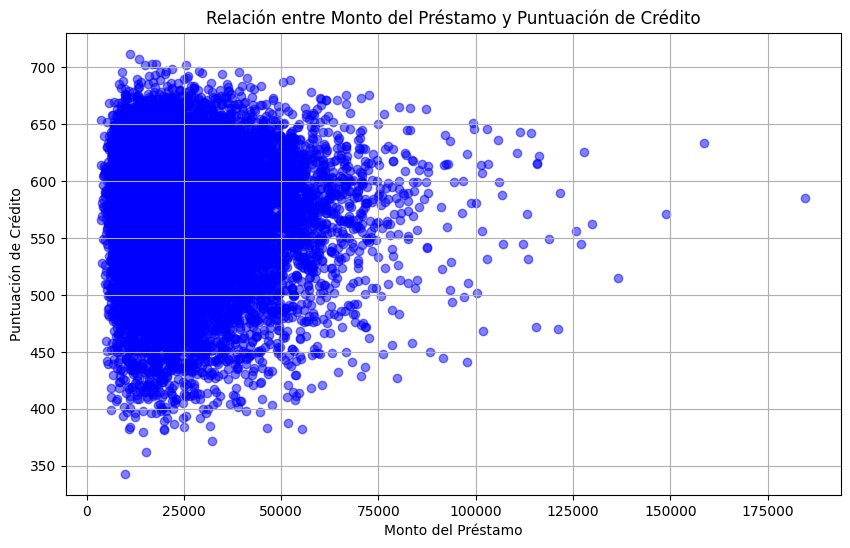

In [58]:
# Gráfico: Relación entre el monto del préstamo y la puntuación de crédito
plt.figure(figsize=(10, 6))
plt.scatter(df['MontoPrestamo'], df['PuntuacionCredito'], alpha=0.5, color='blue')
plt.title('Relación entre Monto del Préstamo y Puntuación de Crédito')
plt.xlabel('Monto del Préstamo')
plt.ylabel('Puntuación de Crédito')
plt.grid(True)
plt.show()


### Una observación de este gráfico muestra que los solicitantes con puntuaciones de crédito más bajas tienden a pedir montos de préstamo más pequeños. Esto podría deberse a que las instituciones financieras ofrecen menos crédito a personas con menor puntaje de crédito, lo que sugiere una posible relación entre el puntaje y el monto del préstamo aprobado.

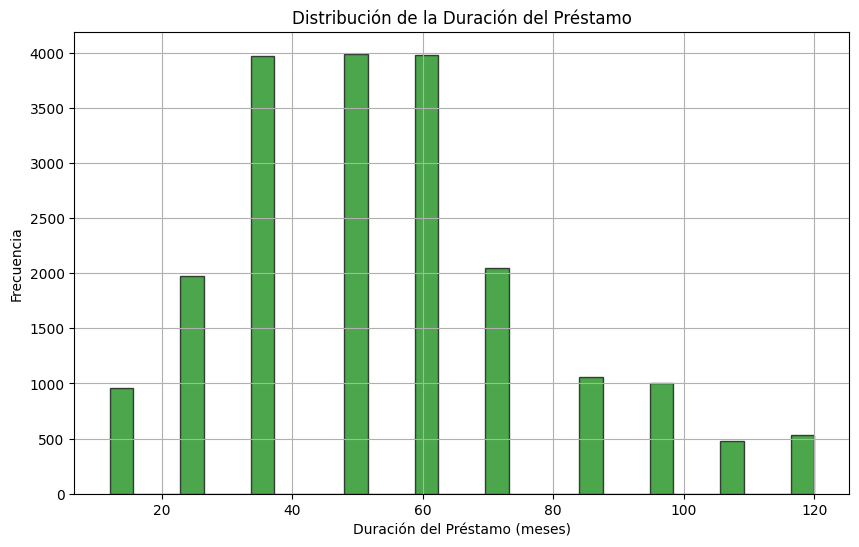

In [59]:
# Gráfico: Histograma de la duración del préstamo
plt.figure(figsize=(10, 6))
plt.hist(df['DuracionPrestamo'], bins=30, color='green', edgecolor='black', alpha=0.7)
plt.title('Distribución de la Duración del Préstamo')
plt.xlabel('Duración del Préstamo (meses)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


### La mayoría de los préstamos tienen una duración de entre 30 y 50 meses. Esto podría indicar que las personas tienden a preferir plazos más largos para pagar sus préstamos. Este dato es relevante para evaluar el riesgo, ya que los plazos más largos pueden aumentar la probabilidad de incumplimiento.

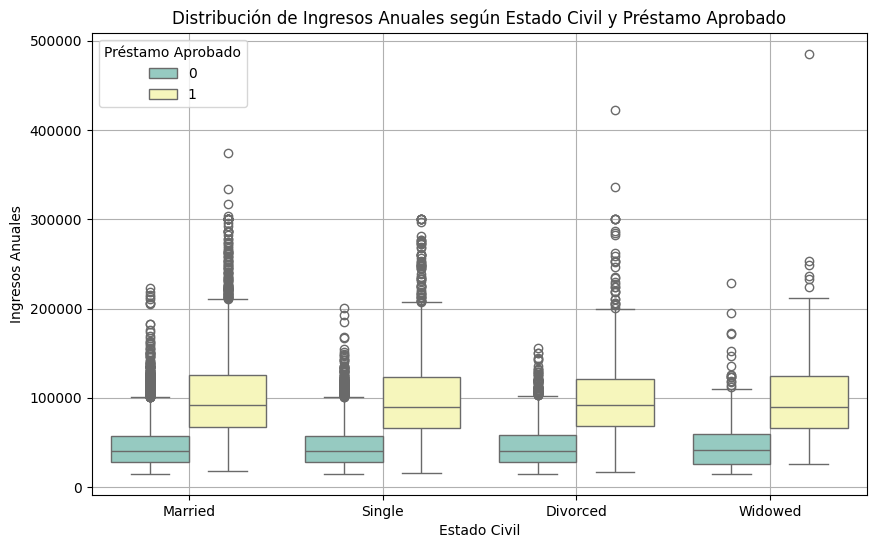

In [60]:
# Gráfico: Boxplot de los ingresos anuales según el estado civil y préstamo aprobado
plt.figure(figsize=(10, 6))
sns.boxplot(x='EstadoCivil', y='IngresosAnuales', hue='PrestamoAprobado', data=df, palette='Set3')
plt.title('Distribución de Ingresos Anuales según Estado Civil y Préstamo Aprobado')
plt.xlabel('Estado Civil')
plt.ylabel('Ingresos Anuales')
plt.grid(True)
plt.legend(title='Préstamo Aprobado')
plt.show()



### El estado civil parece tener un impacto en los ingresos anuales. Las personas casadas o en pareja tienden a tener mayores ingresos, lo cual puede influir en su capacidad para obtener un préstamo y su estabilidad financiera.

### Gráficos Seaborn

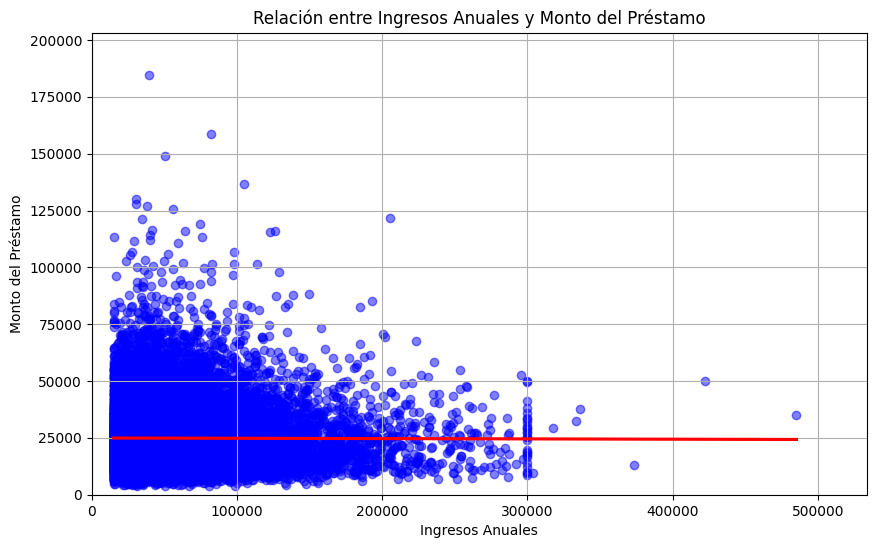

In [61]:
# Gráfico: Dispersión con ajuste de regresión entre Ingresos Anuales y Monto del Préstamo
plt.figure(figsize=(10, 6))
sns.regplot(x='IngresosAnuales', y='MontoPrestamo', data=df, scatter_kws={'alpha': 0.5, 'color': 'blue'}, 
            line_kws={'color': 'red'}, ci=None)  # Sin intervalo de confianza
plt.title('Relación entre Ingresos Anuales y Monto del Préstamo')
plt.xlabel('Ingresos Anuales')
plt.ylabel('Monto del Préstamo')
plt.xlim(0, df['IngresosAnuales'].max() * 1.1)  # Ajustar límites del eje x
plt.ylim(0, df['MontoPrestamo'].max() * 1.1)  # Ajustar límites del eje y
plt.grid(True)
plt.show()


### Este gráfico muestra la relación entre los ingresos anuales y el monto del préstamo, con una línea de regresión que indica una tendencia positiva. A medida que los ingresos aumentan, el monto del préstamo solicitado también tiende a aumentar.

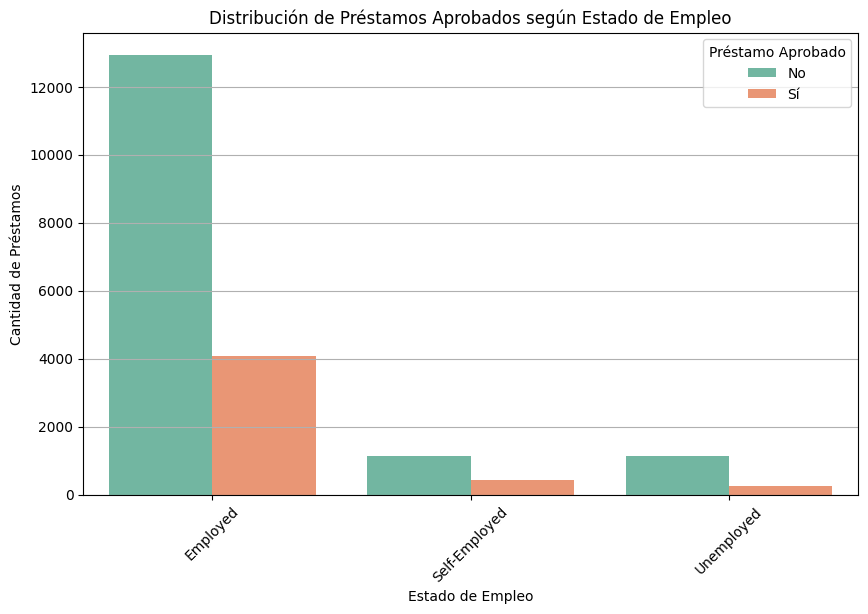

In [62]:
# Gráfico: Distribución de préstamos aprobados según el estado de empleo
plt.figure(figsize=(10, 6))
sns.countplot(x='EstadoEmpleo', hue='PrestamoAprobado', data=df, palette='Set2', dodge=True)
plt.title('Distribución de Préstamos Aprobados según Estado de Empleo')
plt.xlabel('Estado de Empleo')
plt.ylabel('Cantidad de Préstamos')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x
plt.grid(axis='y')  # Solo mostrar la cuadrícula en el eje y
plt.legend(title='Préstamo Aprobado', labels=['No', 'Sí'])
plt.show()



### Las personas que están empleadas tienen una mayor tasa de aprobación de préstamos, lo que no es sorprendente, ya que contar con empleo asegura una fuente estable de ingresos y, por lo tanto, menos riesgo para las instituciones financieras.



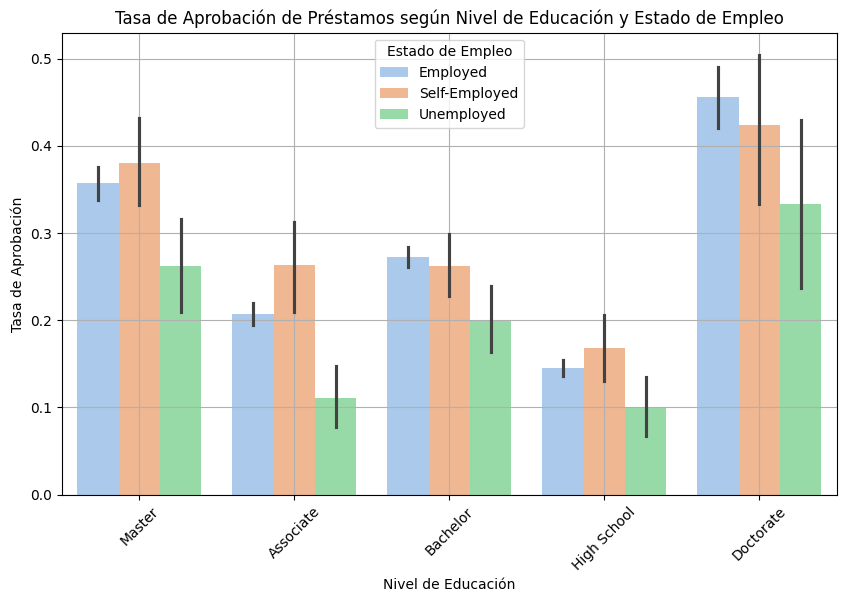

In [63]:
# Gráfico: Tasa de Aprobación de Préstamos según Nivel de Educación con hue por Estado de Empleo
plt.figure(figsize=(10, 6))
sns.barplot(x='NivelEducacion', y='PrestamoAprobado', hue='EstadoEmpleo', data=df, palette='pastel')
plt.title('Tasa de Aprobación de Préstamos según Nivel de Educación y Estado de Empleo')
plt.xlabel('Nivel de Educación')
plt.ylabel('Tasa de Aprobación')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Estado de Empleo')
plt.show()

### Este gráfico permite observar cómo la tasa de aprobación de préstamos varía no solo según el nivel educativo, sino también en función del estado de empleo de los solicitantes. Al comparar los diferentes grupos de estado de empleo, podemos identificar si hay un patrón que sugiera que ciertos estados laborales (como "Employed" o "Unemployed") influyen en la probabilidad de que se aprueben los préstamos para diferentes niveles educativos. Esto puede indicar que los prestamistas valoran la estabilidad laboral en relación con la educación al tomar decisiones sobre la aprobación de préstamos.

## Análisis de Correlación

### Descripción

El análisis de correlación se llevó a cabo para identificar las relaciones entre las variables numéricas del conjunto de datos y su impacto en la aprobación de préstamos. Se utilizó la matriz de correlación para evaluar cómo cada variable se relaciona con la variable objetivo `PrestamoAprobado`.

### Procedimiento

1. **Selección de Variables Numéricas**: Se seleccionaron únicamente las columnas numéricas del DataFrame para realizar el análisis de correlación.
2. **Cálculo de la Matriz de Correlación**: Se calculó la matriz de correlación utilizando el método `.corr()` de pandas, lo que permitió observar la relación entre cada par de variables.
3. **Visualización**: Se generó un heatmap utilizando la biblioteca Seaborn para representar gráficamente la matriz de correlación. Esto ayuda a visualizar las relaciones de manera clara y efectiva.

### Resultados

Los resultados revelaron que las variables `IngresosAnuales` y `PuntuacionRiesgo` tienen correlaciones positivas significativas con `PrestamoAprobado`, con valores de 0.5979 y 0.5642, respectivamente. Por otro lado, variables como `MontoPrestamo`, `BaseInterestRate` e `InterestRate` mostraron correlaciones negativas, sugiriendo que a medida que estos valores aumentan, la probabilidad de aprobación de un préstamo disminuye.

Este análisis proporciona una base sólida para realizar modelado predictivo, permitiendo identificar qué variables pueden ser más relevantes para predecir la aprobación de préstamos.



PrestamoAprobado                   1.000000
IngresosAnuales                    0.597900
PuntuacionRiesgo                   0.564157
NetWorth                           0.187892
TotalActivos                       0.184011
PuntuacionCredito                  0.142000
Edad                               0.141029
Experiencia                        0.140755
DuracionHistorialCredito           0.105949
MonthlyLoanPayment                 0.031027
HistorialPagos                     0.030804
JobTenure                          0.004997
UtilityBillsPaymentHistory         0.003303
NumeroDependientes                 0.001717
SaldoCuentaAhorros                 0.000961
SaldoCuentaCorriente               0.000660
RatioDeudaIngresos                 0.000034
NumeroLineasCreditoAbiertas       -0.004769
NumeroConsultasCredito            -0.005885
TasaUtilizacionTarjetaCredito     -0.010466
TotalLiabilities                  -0.029434
IncumplimientosPrestamosPrevios   -0.065343
PagosDeudaMensuales             

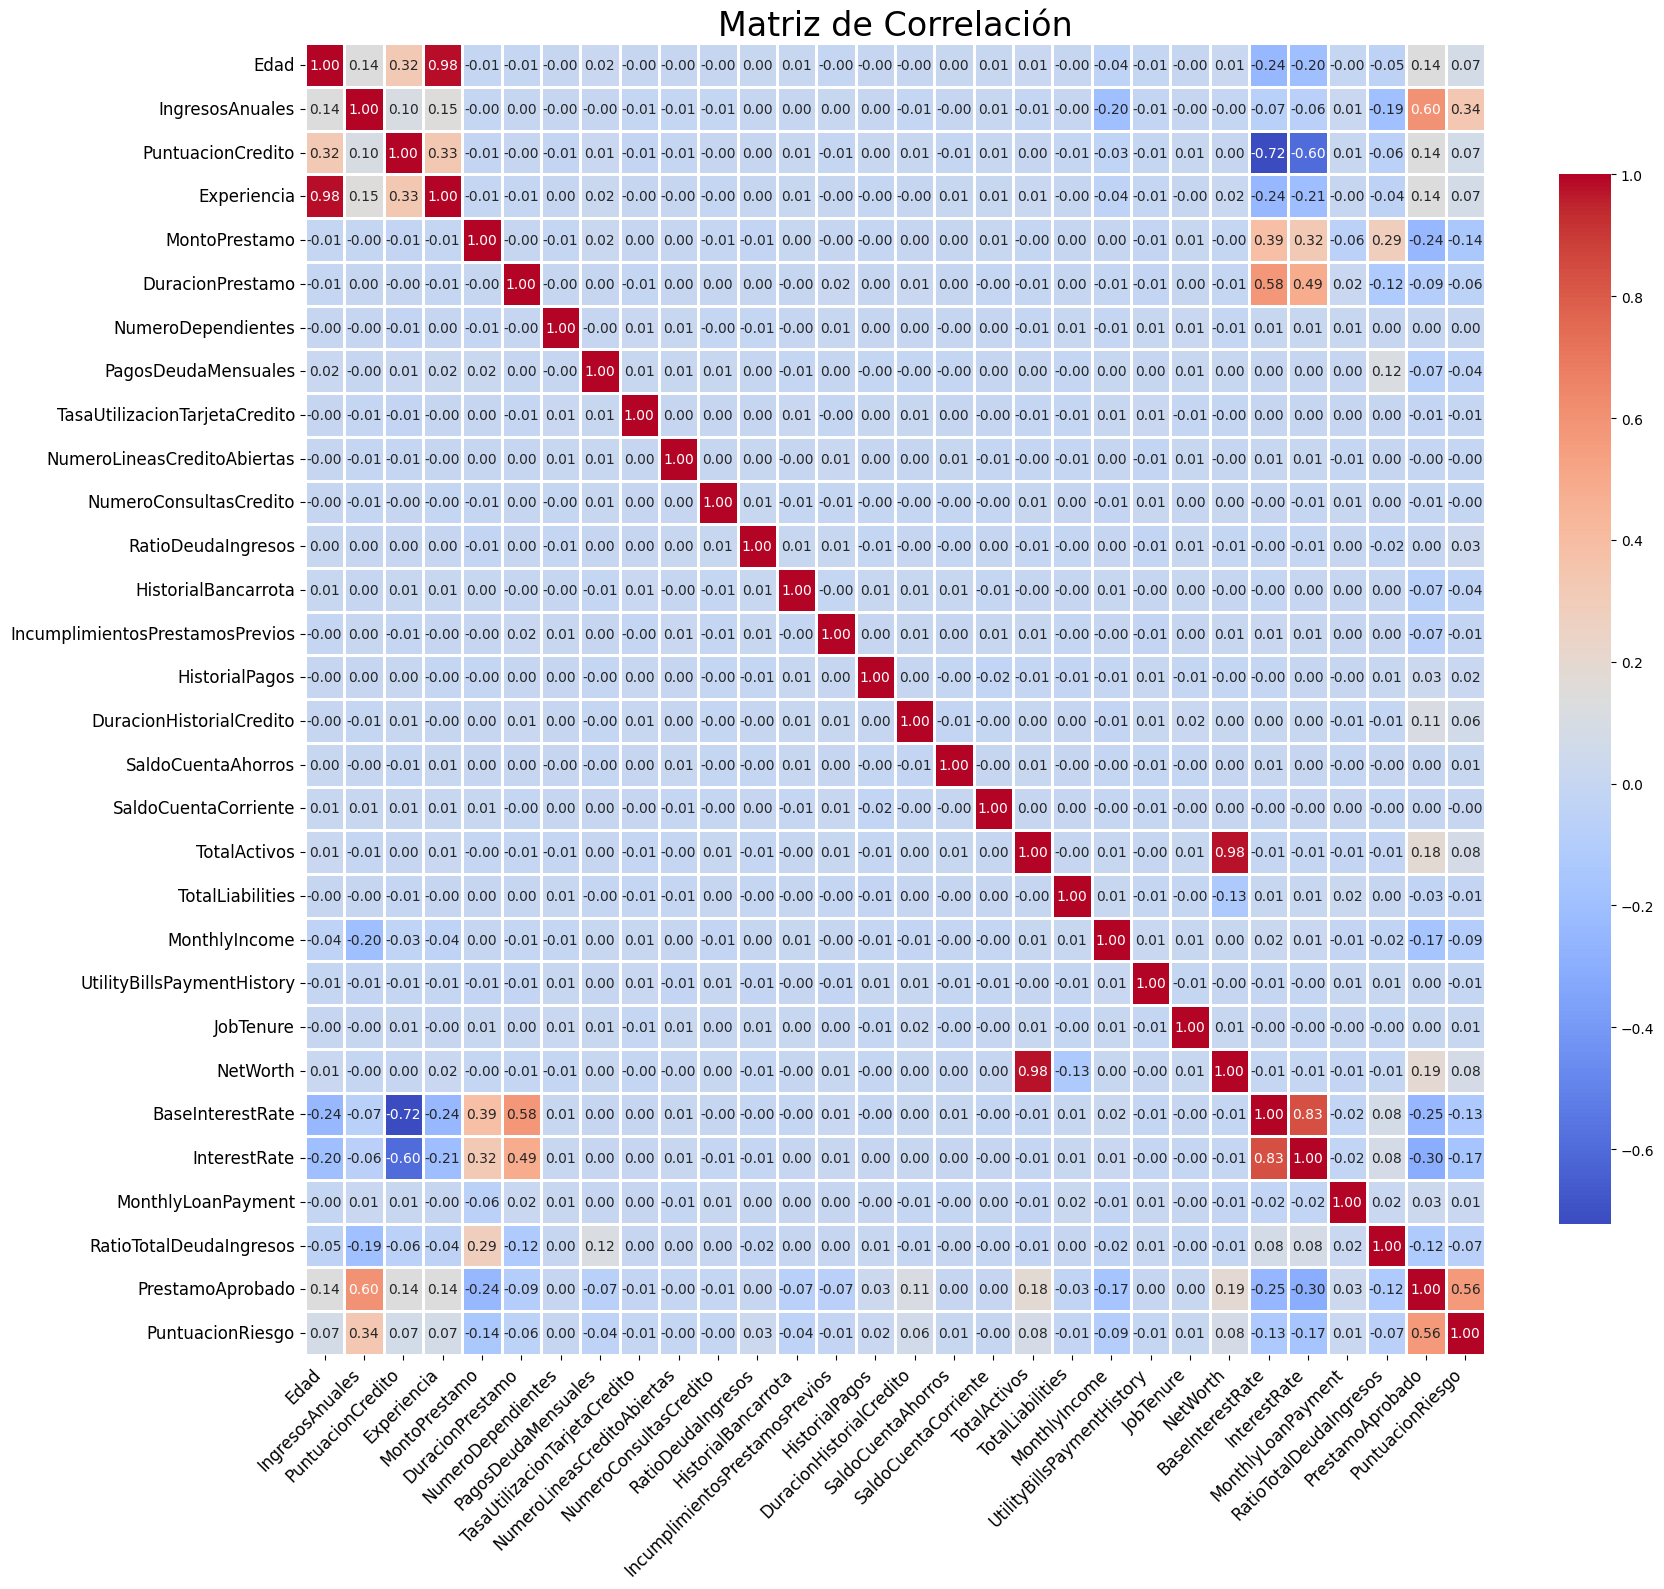

In [64]:
# Seleccionar solo las variables numéricas
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Calcular la matriz de correlación
correlation_matrix = df[numerical_columns].corr()

# Mostrar la correlación con la variable objetivo 'PrestamoAprobado'
print(correlation_matrix['PrestamoAprobado'].sort_values(ascending=False))


plt.figure(figsize=(18, 16))  # Aumentar el tamaño de la figura

# Crear el heatmap de la matriz de correlación
sns.heatmap(
    correlation_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap='coolwarm', 
    annot_kws={"size": 10},  # Aumentar el tamaño de las anotaciones
    linewidths=0.8,  # Aumentar el ancho de las líneas entre celdas
    linecolor='white',  # Cambiar el color de las líneas
    cbar_kws={"shrink": .8}  # Ajustar el tamaño de la barra de color
)

# Ajustar el título y las etiquetas
plt.title('Matriz de Correlación', fontsize=24)
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotar las etiquetas del eje X
plt.yticks(rotation=0, fontsize=12)  # Mantener las etiquetas del eje Y horizontales

# Mostrar el gráfico
plt.tight_layout()  # Ajustar los márgenes para evitar superposiciones
plt.show()

## Análisis de Clasificación del Préstamo Aprobado

En este paso, se llevó a cabo la selección y entrenamiento de un modelo de clasificación para predecir la variable objetivo `PrestamoAprobado`, que indica si un préstamo fue aprobado (1) o no (0). Dado que la variable objetivo es binaria, se eligieron varios algoritmos de clasificación, entre ellos, la Regresión Logística, Random Forest y Gradient Boosting.

### Pasos

### 1. Selección del Model
### 2. Preprocesamiento de Datos
### 3. Entrenamiento y Evaluación del Modelo
### 4. Resultados



In [65]:
# Importar bibliotecas necesarias
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Definir las características (X) y la variable objetivo (y)
X = df.drop('PrestamoAprobado', axis=1)  # Eliminar la columna objetivo
y = df['PrestamoAprobado']  # Variable objetivo


In [66]:
# Dividir los datos en conjuntos de entrenamiento y prueba 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [67]:
# Filtrar solo columnas numéricas
X_numeric = X.select_dtypes(include=['float64', 'int64'])

# Dividir los datos en conjuntos de entrenamiento y prueba 
X_train, X_test, y_train, y_test = train_test_split(X_numeric, y, test_size=0.2, random_state=42)

# Estandarizar las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [68]:
# Importar el modelo de Regresión Logística
from sklearn.linear_model import LogisticRegression

# Entrenamiento del modelo
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [69]:
# Importar métricas para la evaluación
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predicciones
y_pred = model.predict(X_test)

# Precisión
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy:.2f}')

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(conf_matrix)

# Reporte de clasificación
class_report = classification_report(y_test, y_pred)
print('Reporte de Clasificación:')
print(class_report)

Precisión del modelo: 0.95
Matriz de Confusión:
[[2926   57]
 [ 133  884]]
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      2983
           1       0.94      0.87      0.90      1017

    accuracy                           0.95      4000
   macro avg       0.95      0.93      0.94      4000
weighted avg       0.95      0.95      0.95      4000



In [70]:
# Importar las bibliotecas necesarias
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo con los datos de entrenamiento
rf_model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred_rf = rf_model.predict(X_test)

# Evaluar el modelo
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_confusion_matrix = confusion_matrix(y_test, y_pred_rf)
rf_classification_report = classification_report(y_test, y_pred_rf)

# Imprimir resultados
print(f"Precisión del modelo (Random Forest): {rf_accuracy:.2f}")
print("Matriz de Confusión (Random Forest):")
print(rf_confusion_matrix)
print("Reporte de Clasificación (Random Forest):")
print(rf_classification_report)

Precisión del modelo (Random Forest): 0.94
Matriz de Confusión (Random Forest):
[[2924   59]
 [ 188  829]]
Reporte de Clasificación (Random Forest):
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      2983
           1       0.93      0.82      0.87      1017

    accuracy                           0.94      4000
   macro avg       0.94      0.90      0.91      4000
weighted avg       0.94      0.94      0.94      4000



In [71]:
# Modelo de Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo con los datos de entrenamiento
gb_model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred_gb = gb_model.predict(X_test)

# Evaluar el modelo
gb_accuracy = accuracy_score(y_test, y_pred_gb)
gb_confusion_matrix = confusion_matrix(y_test, y_pred_gb)
gb_classification_report = classification_report(y_test, y_pred_gb)

# Imprimir resultados
print(f"Precisión del modelo (Gradient Boosting): {gb_accuracy:.2f}")
print("Matriz de Confusión (Gradient Boosting):")
print(gb_confusion_matrix)
print("Reporte de Clasificación (Gradient Boosting):")
print(gb_classification_report)


Precisión del modelo (Gradient Boosting): 0.94
Matriz de Confusión (Gradient Boosting):
[[2931   52]
 [ 168  849]]
Reporte de Clasificación (Gradient Boosting):
              precision    recall  f1-score   support

           0       0.95      0.98      0.96      2983
           1       0.94      0.83      0.89      1017

    accuracy                           0.94      4000
   macro avg       0.94      0.91      0.92      4000
weighted avg       0.94      0.94      0.94      4000



| Modelo                 | Precisión | Recall - Clase 0 | Recall - Clase 1 | F1-Score - Clase 0 | F1-Score - Clase 1 | Exactitud |
|-----------------------|-----------|------------------|------------------|---------------------|---------------------|-----------|
| Logistic Regression    | 0.95      | 0.98             | 0.87             | 0.97                | 0.90                | 0.95      |
| Random Forest          | 0.94      | 0.98             | 0.82             | 0.96                | 0.87                | 0.94      |
| Gradient Boosting      | 0.94      | 0.98             | 0.83             | 0.96                | 0.89                | 0.94      |


## CONCLUSIONES

1. **Variables Clave para la Aprobación de Préstamos**: El análisis de las características del conjunto de datos reveló que varias variables son determinantes para la aprobación de préstamos. Entre las más relevantes se encuentran:
   - **Ingresos Anuales**: Una mayor cantidad de ingresos anuales se asocia con una mayor probabilidad de aprobación del préstamo.
   - **Puntuación de Riesgo**: Esta variable muestra una fuerte correlación positiva con la aprobación, sugiriendo que un mejor perfil de riesgo incrementa las probabilidades de recibir el préstamo.
   - **Puntuación de Crédito**: Las puntuaciones de crédito más altas indican un historial crediticio favorable, lo que también se traduce en una mayor tasa de aprobación.

2. **Desempeño del Modelo**: Los modelos de clasificación implementados (Regresión Logística, Random Forest y Gradient Boosting) lograron precisiones superiores al 94%. Esto significa que los modelos pueden predecir correctamente más del 94% de los casos de aprobación y rechazo de préstamos en el conjunto de datos de prueba. 
   - **Regresión Logística**: Ofreció una precisión del 95%, indicando su capacidad para captar patrones en las variables lineales.
   - **Random Forest**: Logró una precisión del 94%, destacándose por su robustez frente al sobreajuste y su habilidad para manejar interacciones complejas entre variables.
   - **Gradient Boosting**: Presentó también una precisión del 94%, siendo un modelo potente que combina múltiples árboles de decisión, lo que permite obtener predicciones más precisas.


3. **Optimización de la Evaluación Crediticia**: Los hallazgos permitirán a la institución financiera mejorar sus procesos de evaluación crediticia. Al enfocar el análisis en las variables más influyentes, se pueden diseñar estrategias más efectivas para la aprobación de préstamos, reduciendo el riesgo de morosidad y mejorando la rentabilidad.


